In [2]:
!pip install seaborn

    100% |████████████████████████████████| 215kB 3.8MB/s ta 0:00:01
You are using pip version 19.0.3, however version 19.2.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Install graphviz first

### Mac OSX
```
brew install graphviz
```

###  Ubuntu
```
sudo apt-get install graphviz libgraphviz-dev pkg-config
```

In [10]:
!pip install pygraphviz

  Using cached https://files.pythonhosted.org/packages/7e/b1/d6d849ddaf6f11036f9980d433f383d4c13d1ebcfc3cd09bc845bda7e433/pygraphviz-1.5.zip
  Running setup.py install for pygraphviz ... done
You are using pip version 19.0.3, however version 19.2.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [137]:
import math
import numpy as np
import networkx as nx
import pandas as pd
from collections import Counter
import operator

# Plotting
import matplotlib
# # matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Networkx
from networkx.drawing.nx_agraph import graphviz_layout
from viz import dzcnapy_plotlib as dzcnapy
from util.paths import get_output_file_path
from util.pickles import load_pickle_file

In [484]:
def get_colors(depth):
    return sns.cubehelix_palette(depth, start=3, rot=100, reverse=True)
    #return sns.hls_palette(10)
    sns.palplot(colors)
    
def plot_network(graph, title):
    plt.axis('off')
    pos = graphviz_layout(graph)
    depth = max(nx.get_node_attributes(graph,'generation').values()) + 1
    colors = get_colors(depth)
    color = [colors[graph.node[n].get("generation", 0)] for n in graph]
    dzcnapy.small_attrs["node_color"] = color
    dzcnapy.small_attrs["legend.fontsize"] = 20
    nx.draw_networkx(graph, pos=pos, with_labels=False, **dzcnapy.small_attrs)
    patchList = []
    for index in range(depth):
        data_key = mpatches.Patch(color=colors[index], label='Generation {}'.format(index))
        patchList.append(data_key)
    plt.legend(handles=patchList)
    dzcnapy.set_extent(pos, plt)
    dzcnapy.plot(title, [12, 8], save=True)

In [139]:

from util.paths import get_output_file_path
from util.pickles import load_pickle_file

In [491]:
import networkx as nx
from tqdm import tqdm

def build_networkx_graph(unique_users):
    network_graph = nx.DiGraph()
    for i in tqdm(range(len(unique_users))):
        index = unique_users.index[i]
        network_graph.add_node(index,
                             user_id = unique_users.loc[index, 'id'],
                             time_lapsed = unique_users.loc[index, 'time_lapsed'],
                             followers_count = unique_users.loc[index, 'followers_count'],
                             friends_count = unique_users.loc[index, 'friends_count'],
                             generation = int(unique_users.loc[index, 'generation']),
                             time_since_seed = unique_users.loc[index, 'time_since_seed'],
                            )
        source_index = unique_users.loc[index, 'source_index']
        #if np.isnan(source_index) == False:
        network_graph.add_edge(source_index, index)
    return network_graph

In [449]:
givenchy_users=load_pickle_file(get_output_file_path("givenchy_users.dat"))

Loading data file from /Users/syamantak/JayateeB/dissertation/output/givenchy_users.dat
Loaded 5973 entries


In [451]:
givenchy_users

text  time_lapsed   order  \
0     So sad to hear that fashion designer Hubert de...         0.00     1.0   
1     RT @davelackie: So sad to hear that fashion de...         0.15     2.0   
2     RT @davelackie: So sad to hear that fashion de...         0.23     3.0   
3     RT @davelackie: So sad to hear that fashion de...         0.63     4.0   
4     Today we mourn the death of a #fashion legend;...         1.13     5.0   
5     RT @davelackie: So sad to hear that fashion de...         1.18     6.0   
6     RT @davelackie: So sad to hear that fashion de...         1.32     7.0   
7     RT @davelackie: So sad to hear that fashion de...         1.83     8.0   
8     RT @davelackie: So sad to hear that fashion de...         2.15     9.0   
9     RT @davelackie: So sad to hear that fashion de...         2.42    10.0   
10    RT @davelackie: So sad to hear that fashion de...         2.72    11.0   
11    RT @davelackie: So sad to hear that fashion de...         2.77    12.0   
12    RT @davelackie: So sad to hear that fashion de...         3.17    13.0   
13    RT @davelackie: So sad to hear that fashion de...         4.73    14.0   
14    RT @davelackie: So sad to hear that fashion de...         6.15    15.0   
15    RT @davelackie: So sad to hear that fashion de...        11.35    16.0   
16    RT @davelackie: So sad to hear that fashion de...        11.60    17.0   
17    RT @davelackie: So sad to hear that fashion de...        13.07    18.0   
18    RT @davelackie: So sad to hear that fashion de...        14.63    19.0   
19    RT @davelackie: So sad to hear that fashion de...        16.72    20.0   
20    RT @davelackie: So sad to hear that fashion de...        16.88    21.0   
21    Celebrated designer Hubert de Givenchy has die...        17.00    22.0   
22    RT @davelackie: So sad to hear that fashion de...        17.50    23.0   
23    RT @davelackie: So sad to hear that fashion de...        17.78    24.0   
24    RT @davelackie: So sad to hear that fashion de...        18.37    25.0   
25    Hubert de Givenchy, has passed away. He dresse...        18.68    26.0   
26    RT @Fashionista_com: Celebrated designer Huber...        18.95    27.0   
27    RT @davelackie: So sad to hear that fashion de...        18.95    28.0   
28    RT @Fashionista_com: Celebrated designer Huber...        20.15    29.0   
29    RT @Fashionista_com: Celebrated designer Huber...        20.73    30.0   
...                                                 ...          ...     ...   
4981  RT @supermodeldaiIy: Hubert de Givenchy, found...      1378.53  4982.0   
4982  RT @IAMFASHlON: One of the most influential fa...      1379.40  4983.0   
4983  RT @IAMFASHlON: One of the most influential fa...      1380.32  4984.0   
4984  RT @IAMFASHlON: One of the most influential fa...      1380.40  4985.0   
4985  RT @davelackie: So sad to hear that fashion de...      1386.08  4986.0   
4986  RT @MEENAVOGUEE: The iconic, Hubert de Givench...      1386.90  4987.0   
4987  RT @IAMFASHlON: One of the most influential fa...      1387.45  4988.0   
4988  RT @IAMFASHlON: One of the most influential fa...      1388.83  4989.0   
4989  RT @IAMFASHlON: One of the most influential fa...      1388.88  4990.0   
4990  RT @IAMFASHlON: One of the most influential fa...      1391.52  4991.0   
4991  RT @IAMFASHlON: One of the most influential fa...      1392.62  4992.0   
4992  RT @IAMFASHlON: One of the most influential fa...      1395.37  4993.0   
4993  RT @IAMFASHlON: One of the most influential fa...      1396.27  4994.0   
4994  RT @IAMFASHlON: One of the most influential fa...      1397.87  4995.0   
4995  RT @IAMFASHlON: One of the most influential fa...      1399.88  4996.0   
4996  RT @IAMFASHlON: One of the most influential fa...      1402.30  4997.0   
4997  RT @IAMFASHlON: One of the most influential fa...      1413.20  4998.0   
4998  RT @IAMFASHlON: One of the most influential fa...      1413.32  4999.0   
4999  RT @MEENAVOGUEE: The iconic, Hubert de Givenc

In [450]:
givenchy_users = givenchy_users[givenchy_users['time_lapsed'].isnull() == False]

In [435]:
givenchy_users[givenchy_users["source_index"].isnull() == True]

text  time_lapsed  order  \
0  So sad to hear that fashion designer Hubert de...          0.0    1.0   

           created_at                                        description  \
0 2009-12-31 13:25:24  Editor, BEAUTY the guide magazine & beauty on-...   

   favourites_count  followers_count  \
0             11938           143119   

                                      followers_json  friends_count  \
0  [999926283558535168, 3660960976, 36806897, 800...           4643   

                                        friends_json           ...             \
0  [4675800379, 15030907, 986141250976960513, 156...           ...              

   source_index  seed_index generation  time_since_seed user_created_days  \
0          None           0          0                0              2993   

  normalized_statuses_count normalized_followers_count  \
0                 60.605747                  47.817908   

   normalized_favourites_count  normalized_listed_count  \
0                      3.98864                 0.185433   

  normalized_friends_count  
0                 1.551286  

[1 rows x 30 columns]

In [424]:
a=[0,1,2,3,4,5,6]
unique_users=givenchy_users[givenchy_users.generation.isin(a)]

In [170]:
network_all = build_networkx_graph(unique_users)

100%|██████████| 5011/5011 [00:00<00:00, 11263.05it/s]


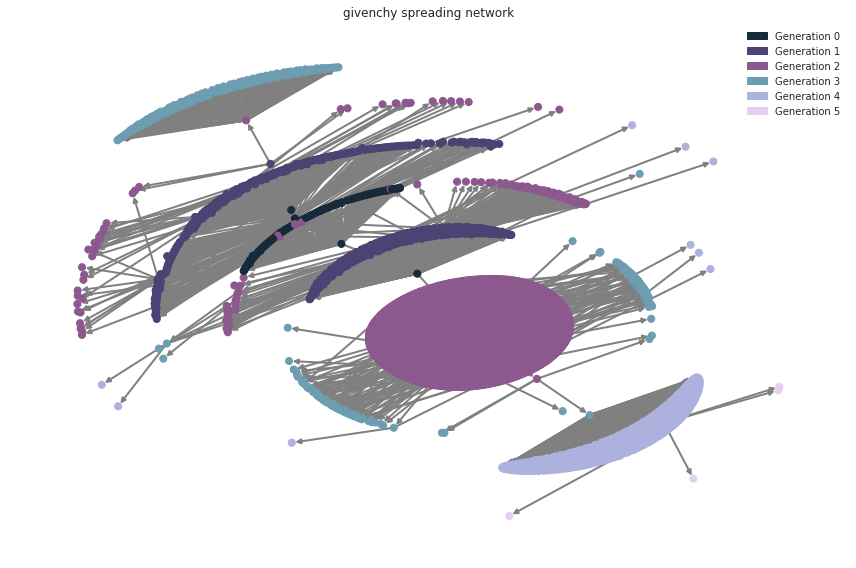

In [171]:
plot_network(network_all, "givenchy spreading network")

In [490]:
def spreading_network(users, title):
    users = users[users['time_lapsed'].isnull() == False]
    a=[0,1,2,3,4,5]
    unique_users=users[users.generation.isin(a)]
    network_all = build_networkx_graph(unique_users)
    plot_network(network_all, title)

100%|██████████| 5011/5011 [00:00<00:00, 12262.92it/s]


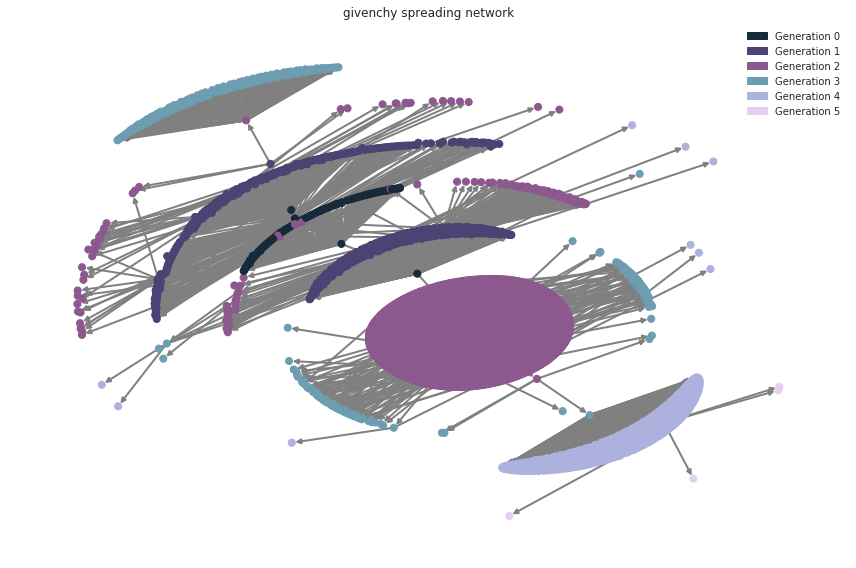

In [454]:
spreading_network(givenchy_users, "givenchy spreading network")

In [444]:
givenchy_users

text  time_lapsed  order  \
0  So sad to hear that fashion designer Hubert de...          0.0    1.0   

           created_at                                        description  \
0 2009-12-31 13:25:24  Editor, BEAUTY the guide magazine & beauty on-...   

   favourites_count  followers_count  \
0             11938           143119   

                                      followers_json  friends_count  \
0  [999926283558535168, 3660960976, 36806897, 800...           4643   

                                        friends_json           ...             \
0  [4675800379, 15030907, 986141250976960513, 156...           ...              

   source_index  seed_index generation  time_since_seed user_created_days  \
0          None           0          0                0              2993   

  normalized_statuses_count normalized_followers_count  \
0                 60.605747                  47.817908   

   normalized_favourites_count  normalized_listed_count  \
0                      3.98864                 0.185433   

  normalized_friends_count  
0                 1.551286  

[1 rows x 30 columns]

In [122]:
gs_6_hrs_retrained = pd.read_csv(get_output_file_path("givenchy_simulation_result_6hrs_6_hrs_model_retrained.csv"))

In [123]:
gs_6_hrs_retrained = gs_6_hrs_retrained[gs_6_hrs_retrained['time_lapsed'].isnull() == False]

In [268]:
gu_retrained = gs_6_hrs_retrained.groupby(["generation"])["id"].count()

In [269]:
gu_retrained.name= "retrained"

In [270]:
gu_retrained

generation
0.0      88
1.0     875
2.0    2959
3.0     370
4.0     557
5.0      18
6.0       2
Name: retrained, dtype: int64

100%|██████████| 4867/4867 [00:00<00:00, 11929.86it/s]


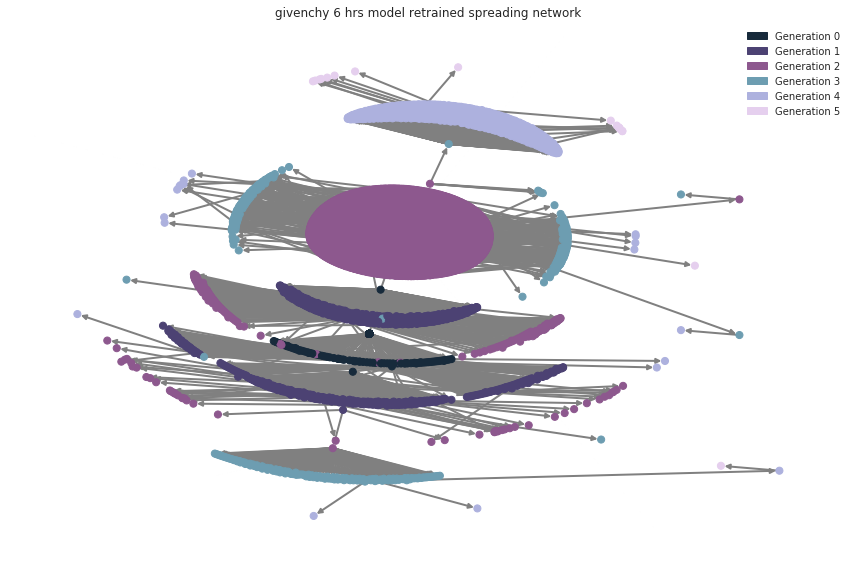

In [124]:
spreading_network(gs_6_hrs_retrained, "givenchy 6 hrs model retrained spreading network")

100%|██████████| 4867/4867 [00:00<00:00, 7653.77it/s]


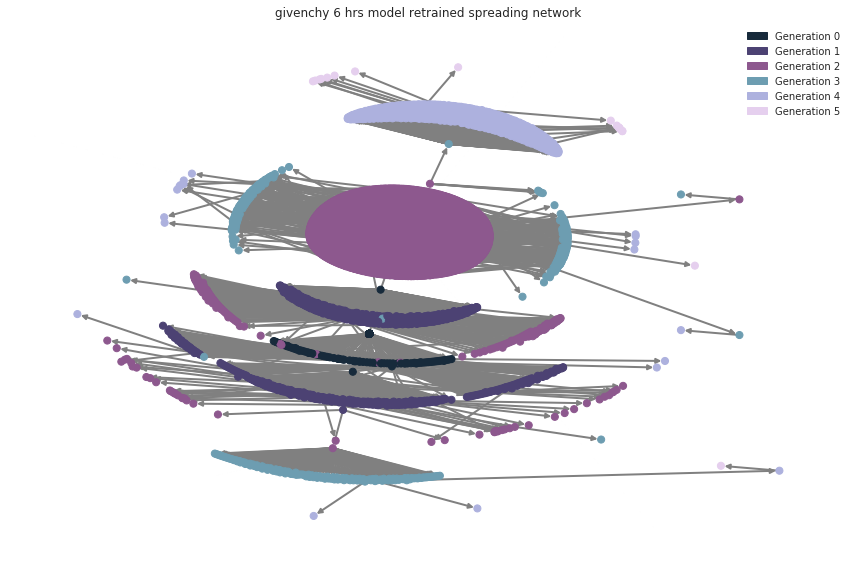

In [142]:
spreading_network(gs_6_hrs_retrained, "givenchy 6 hrs model retrained spreading network")

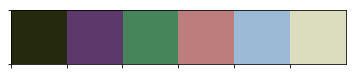

In [39]:
sns.palplot(sns.cubehelix_palette(6, start=3, rot=500, reverse=True))

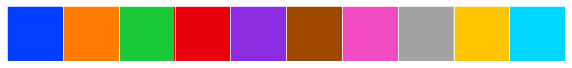

In [101]:
sns.palplot(sns.color_palette("bright"))

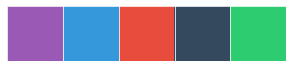

In [115]:
flatui = ["#9b59b6", "#3498db","#e74c3c", "#34495e", "#2ecc71"]
    # create a color palette
sns.palplot(sns.color_palette(flatui).as_hex())


In [103]:
my_cmap

In [143]:
nyc_usrs_file = "/Users/syamantak/JayateeB/new_files/data/nyc/nyc_users.dat"
nyc_users=load_pickle_file(nyc_usrs_file)

Loading data file from /Users/syamantak/JayateeB/new_files/data/nyc/nyc_users.dat
Loaded 135912 entries


In [50]:
nyc_users[['screen_name','followers_count']].sort_values(by = 'followers_count',ascending = False)[0:10]

screen_name  followers_count
12973          nytimes         40466012
92795              CNN         38721228
126465       zaynmalik         27066442
132181         pitbull         26458612
39496         BBCWorld         22038908
115603  HillaryClinton         21715371
4181           FoxNews         17469233
73758       WhiteHouse         16100033
12896              WSJ         15231947
5572    washingtonpost         12292538

In [592]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize = 10)
        
def plot_grouped_bar(labels, first_series, second_series, first_label, second_label, title, ylabel, xlabel):
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    plt.style.use('seaborn-darkgrid')

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, first_series, width, label=first_label, color='#2169D4')
    rects2 = ax.bar(x + width/2, second_series, width, label=second_label, color='#2BBD0E')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylabel,fontsize = 16)
    ax.set_xlabel(xlabel,fontsize = 16)
    ax.set_title(title,fontsize = 16)
    ax.set_xticks(x)
    ax.set_xticklabels(labels,fontsize = 16)
    #ax.set_yticklabels(fontsize = 16)
    ax.legend(fontsize = 16)
    autolabel(rects1, ax)
    autolabel(rects2, ax)

    fig.tight_layout()
    fig.set_size_inches(12, 8, forward=True)
    plt.yticks(fontsize=16)
    plt.show()




In [539]:
from matplotlib.colors import ListedColormap

color_pallette = ['blue','green','black']

def plot_grouped_line(df, title, xlabel, ylabel, x_column="x", fig_size=[12, 8]):
    # style
    plt.style.use('seaborn-darkgrid')
    #flatui = ["#9b59b6", "#3498db","#e74c3c", "#34495e", "#2ecc71"]
    # create a color palette
    #palette = ListedColormap(sns.color_palette(flatui).as_hex())
    #palette = plt.get_cmap('Set1')

    num=0
    columns = []
    for column in df.drop(x_column, axis=1):
        columns.append(column)
    num_data_points = len(df[column])
    for column in columns:
        num+=1
        plt.plot(df[x_column], df[column], marker='', color=color_pallette[num - 1], linewidth=1, alpha=0.9, label=column)
        for i, (x, y) in enumerate(zip(df[x_column], df[column])):
            if i == 0 or i == 1 or i == num_data_points - 1 or i % 3 == 0:
                label = "{:.2f}".format(y)
                pos_from_xy = -10 if num % 2 == 0 else 10
                plt.annotate(label, # this is the text
                             (x,y), # this is the point to label
                             textcoords="offset points", # how to position the text
                             xytext=(0,pos_from_xy), # distance from text to points (x,y)
                             ha='center',
                             color=color_pallette[num - 1], 
                             fontsize=15) 

    plt.rcParams['figure.figsize'] = fig_size
    plt.legend(fontsize=15)
    # Add titles
    plt.title(title, loc='left', fontsize=15, fontweight=0, color='orange')
    plt.xlabel(xlabel,fontsize=16)
    plt.xticks(df[x_column], rotation=90,fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylabel(ylabel,fontsize=16)


## Actual vs Retrained by generation

In [271]:
a=[0,1,2,3,4,5]
givenchy_users=load_pickle_file(get_output_file_path("givenchy_users.dat"))
givenchy_users = givenchy_users[givenchy_users['time_lapsed'].isnull() == False]
unique_users=givenchy_users[givenchy_users.generation.isin(a)]
gu_generation = unique_users.groupby(["generation"])["id"].count()
gu_generation.name = "actual"

Loading data file from /Users/syamantak/JayateeB/dissertation/output/givenchy_users.dat
Loaded 5973 entries


In [272]:
gs_6_hrs_retrained = pd.read_csv(get_output_file_path("givenchy_simulation_result_6hrs_6_hrs_model_retrained.csv"))
gs_6_hrs_retrained = gs_6_hrs_retrained[gs_6_hrs_retrained['time_lapsed'].isnull() == False]
retrained_unique_users=gs_6_hrs_retrained[gs_6_hrs_retrained.generation.isin(a)]
gu_retrained = retrained_unique_users.groupby(["generation"])["id"].count()
gu_retrained.name= "retrained"

In [277]:
actual_v_retrained_by_generation = pd.concat([gu_generation, gu_retrained], axis=1)

In [278]:
actual_v_retrained_by_generation

actual  retrained
generation                   
0               99         88
1              853        875
2             3198       2959
3              297        370
4              560        557
5                4         18

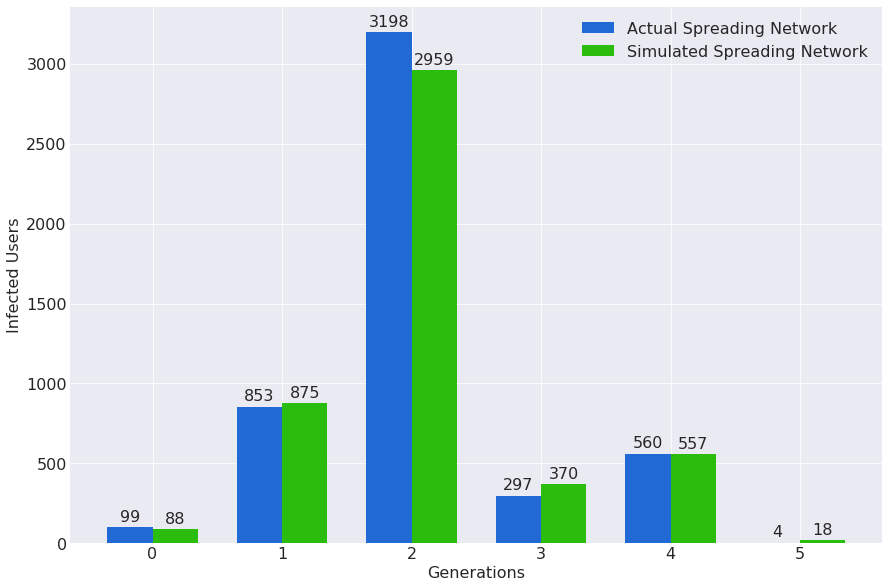

In [551]:
plot_grouped_bar(labels=list(map(lambda x: int(x), gu_retrained.index.tolist())),
                 first_series=gu_generation.tolist(), 
                 second_series=gu_retrained.tolist(), 
                 first_label="Actual Spreading Network", 
                 second_label="Simulated Spreading Network", 
                 title="",
                 ylabel="Infected Users",
                 xlabel="Generations")

## Degree

In [303]:
gen_degree=[0,1,2,3,4,5,6,7,8,9,10]

In [304]:
neighbour_degree_sim = pd.read_csv(get_output_file_path("simulation_result_key_node_avg_neighbour_degree_top_10_not_filtered.csv"))

neighbour_degree_sim = neighbour_degree_sim[neighbour_degree_sim.generation.isin(gen_degree)]


In [305]:
node_degree_sim = pd.read_csv(get_output_file_path("simulation_result_key_node_degree_top_10_0point7_start_time_30.csv"))

node_degree_sim = node_degree_sim[node_degree_sim.generation.isin(gen_degree)]


In [306]:
generation_labels = neighbour_degree_sim.groupby(['generation']).count()['id'].index.tolist()
generation_labels = list(map(lambda x: int(x), generation_labels))
neighbour_degree_generations =  neighbour_degree_sim.groupby(['generation']).count()['id'].tolist()

In [307]:
node_degree_generations = node_degree_sim.groupby(['generation']).count()['id'].tolist()


In [291]:
diff = len(neighbour_degree_generations) - len(node_degree_generations)
for i in range(diff):
    node_degree_generations.append(0)

In [545]:
plot_grouped_bar(labels=generation_labels,
                 first_series=neighbour_degree_generations, 
                 second_series=node_degree_generations, 
                 first_label="Neighbour degree", 
                 second_label="Avg. Node degree", 
                 title="Infected users grouped by generations",
                 ylabel="Infected Users")

TypeError: plot_grouped_bar() got an unexpected keyword argument 'xlabel'

In [349]:
gen_time_lapsed_labels=[0,30,60,90,120,150,180,210,240,270,300, 330, 360, 390, 420]

In [350]:
neighbour_degree_sim = pd.read_csv(get_output_file_path("simulation_result_key_node_avg_neighbour_degree_top_10_not_filtered.csv"))
time_lapsed_labels = neighbour_degree_sim.groupby(['time_lapsed']).count()['id'].index.tolist()
neighbour_degree_sim_filtered = neighbour_degree_sim[neighbour_degree_sim.time_lapsed.isin(gen_time_lapsed_labels)]
neighbour_degree_time_lapsed =  neighbour_degree_sim_filtered.groupby(['time_lapsed']).count()['id'].tolist()
time_lapsed_labels = list(map(lambda x: int(x), time_lapsed_labels))

In [351]:
node_degree_sim = pd.read_csv(get_output_file_path("simulation_result_key_node_degree_top_10_0point7_start_time_30.csv"))
node_degree_sim_filtered = node_degree_sim[node_degree_sim.time_lapsed.isin(gen_time_lapsed_labels)]
node_degree_time_lapsed = node_degree_sim_filtered.groupby(['time_lapsed']).count()['id'].tolist()

In [352]:
n = len(gen_time_lapsed_labels) - len(neighbour_degree_time_lapsed)
for i in range(n):
    neighbour_degree_time_lapsed.append(0)
    
n = len(gen_time_lapsed_labels) - len(node_degree_time_lapsed)
for i in range(n):
    node_degree_time_lapsed.append(0)

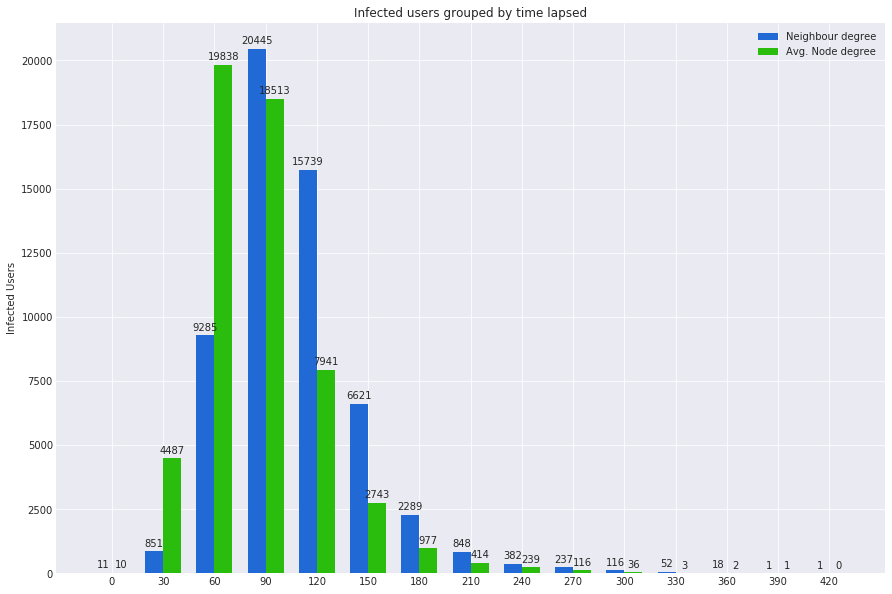

In [353]:
plot_grouped_bar(labels=gen_time_lapsed_labels,
                 first_series=neighbour_degree_time_lapsed, 
                 second_series=node_degree_time_lapsed, 
                 first_label="Neighbour degree", 
                 second_label="Avg. Node degree", 
                 title="Infected users grouped by time lapsed",
                 ylabel="Infected Users")

In [607]:
df1 = pd.read_csv(get_output_file_path("degree_time_lapsed.csv"))

In [608]:
time_lapsed_labels = list(range(0, 450, 30))

In [609]:
time_lapsed_labels

[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420]

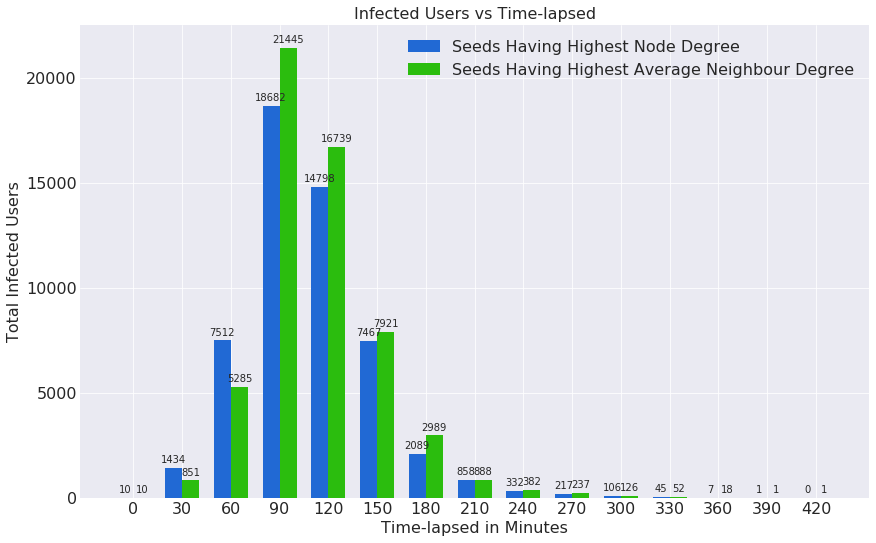

In [611]:
plot_grouped_bar(labels=time_lapsed_labels,
                 first_series=df1["node_degree_time_lapsed"].tolist(),
                 second_series=df1["neighbour_degree_time_lapsed"].tolist(), 
                 first_label="Seeds Having Highest Node Degree", 
                 second_label="Seeds Having Highest Average Neighbour Degree", 
                 title="Infected Users vs Time-lapsed",
                 xlabel="Time-lapsed in Minutes",
                 ylabel="Total Infected Users")

In [601]:
df2 = pd.read_csv(get_output_file_path("betweenness_time_lapsed.csv"))

In [598]:
betweenness_time_lapsed_labels = list(range(0, 450, 30))

In [599]:
betweenness_time_lapsed_labels

[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420]

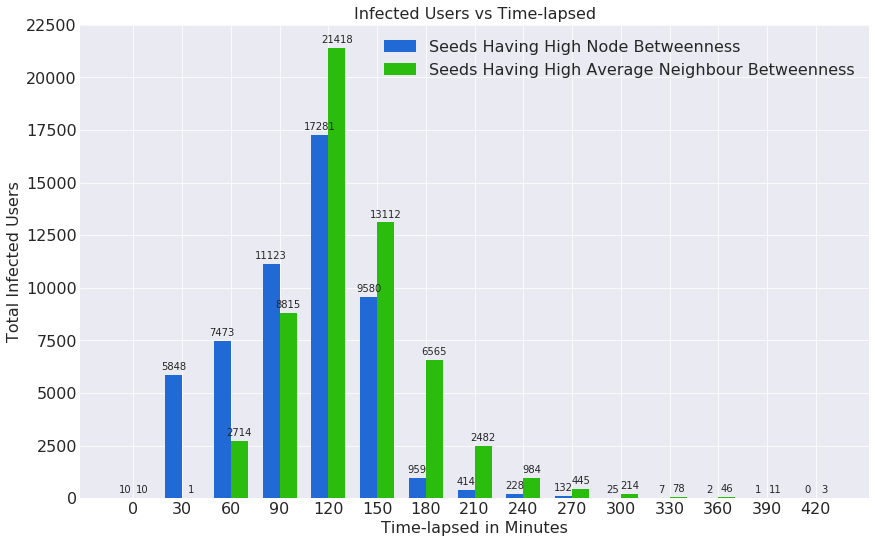

In [603]:
plot_grouped_bar(labels=betweenness_time_lapsed_labels,
                 first_series=df2["node_betweenness_time_lapsed"].tolist(),
                 second_series=df2["neighbour_betweenness_time_lapsed"].tolist(), 
                 first_label="Seeds Having High Node Betweenness", 
                 second_label="Seeds Having High Average Neighbour Betweenness", 
                 title="Infected Users vs Time-lapsed",
                 xlabel="Time-lapsed in Minutes",
                 ylabel="Total Infected Users")

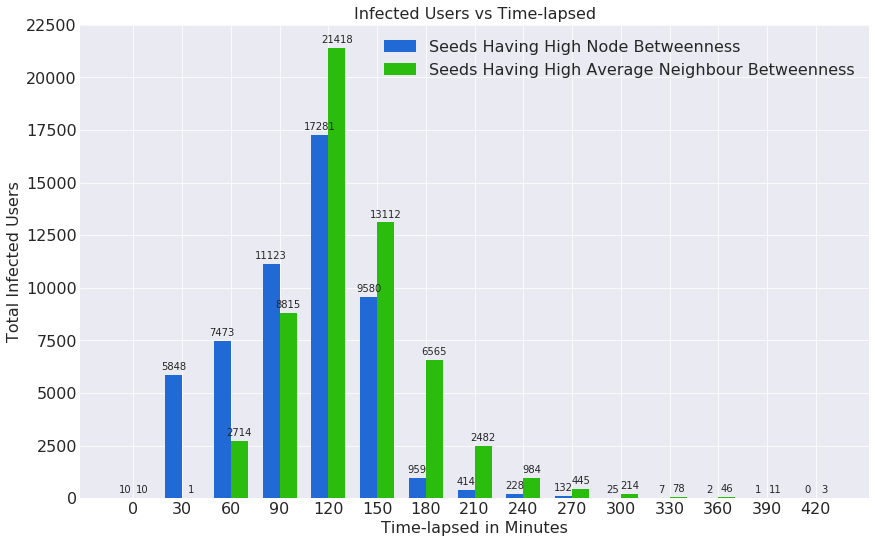

In [604]:
plot_grouped_bar(labels=betweenness_time_lapsed_labels,
                 first_series=df2["node_betweenness_time_lapsed"].tolist(),
                 second_series=df2["neighbour_betweenness_time_lapsed"].tolist(), 
                 first_label="Seeds Having High Node Betweenness", 
                 second_label="Seeds Having High Average Neighbour Betweenness", 
                 title="Infected Users vs Time-lapsed",
                 xlabel="Time-lapsed in Minutes",
                 ylabel="Total Infected Users")

In [58]:
from itertools import accumulate

neighbour_degree_time_lapsed_agg = list(accumulate(neighbour_degree_time_lapsed))
node_degree_time_lapsed_agg = list(accumulate(node_degree_time_lapsed))

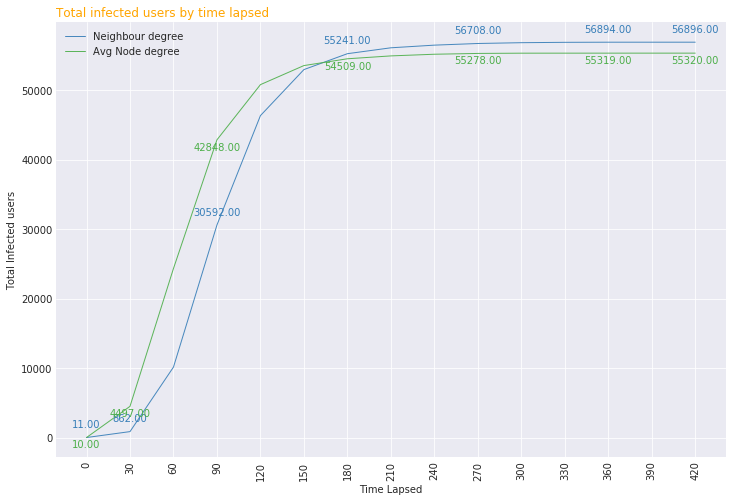

In [63]:
df = pd.DataFrame({"x":time_lapsed_labels,
                   "Neighbour degree":neighbour_degree_time_lapsed_agg,
                   "Avg Node degree": node_degree_time_lapsed_agg})

plot_grouped_line(df=df,
                  title="Total infected users by time lapsed",
                  xlabel="Time Lapsed",
                  ylabel="Total Infected users")


## Betweenness

In [344]:
neighbour_betweenness_file = "simulation_result_key_node_avg_neighbour_betweenness_0_10_10_start_from_30.csv"
key_node_betweenness_file = "simulation_result_key_node_betweenness_0_10_10_start_time_30_0point75.csv"

In [345]:
neighbour_betweenness_df = pd.read_csv(get_output_file_path(neighbour_betweenness_file))
key_node_betweenness_df = pd.read_csv(get_output_file_path(key_node_betweenness_file))

In [346]:
betweenness_generation_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
neighbour_betweenness_generations =  neighbour_betweenness_df.groupby(['generation']).count()['id'].tolist()

In [347]:
key_node_betweenness_generations = key_node_betweenness_df.groupby(['generation']).count()['id'].tolist()
diff = len(neighbour_betweenness_generations) - len(key_node_betweenness_generations)
for i in range(diff):
    key_node_betweenness_generations.append(0)

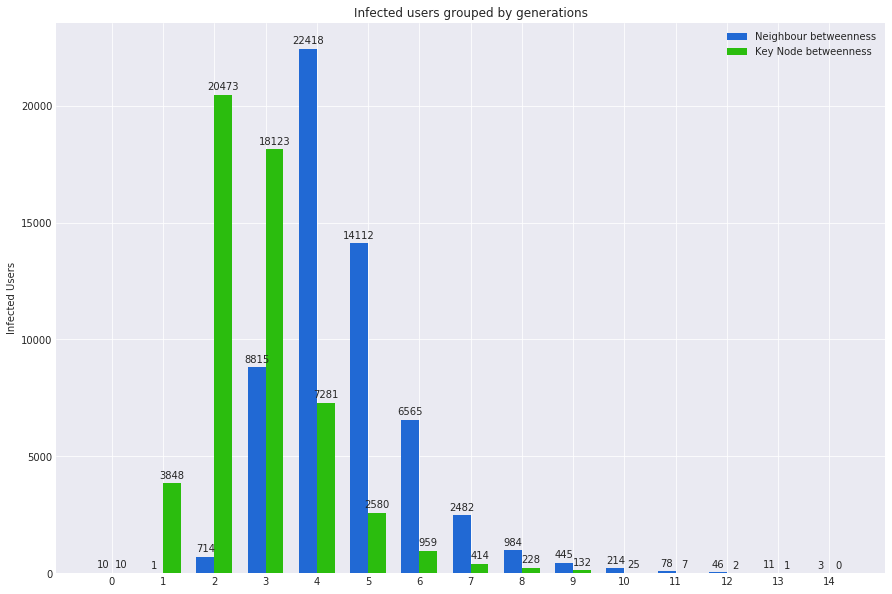

In [348]:
plot_grouped_bar(labels=betweenness_generation_labels,
                 first_series=neighbour_betweenness_generations, 
                 second_series=key_node_betweenness_generations, 
                 first_label="Neighbour betweenness", 
                 second_label="Key Node betweenness", 
                 title="Infected users grouped by generations",
                 ylabel="Infected Users")

In [354]:
betweenness_time_lapsed_labels = [0,30,60,90,120,150,180,210,240,270,300, 330, 360, 390, 420]
neighbour_betweenness_time_lapsed =  neighbour_betweenness_df.groupby(['time_lapsed']).count()['id'].tolist()

In [355]:
key_node_betweenness_time_lapsed = key_node_betweenness_df.groupby(['time_lapsed']).count()['id'].tolist()

diff = len(neighbour_betweenness_time_lapsed) - len(key_node_betweenness_time_lapsed)
for i in range(diff):
    key_node_betweenness_time_lapsed.append(0)

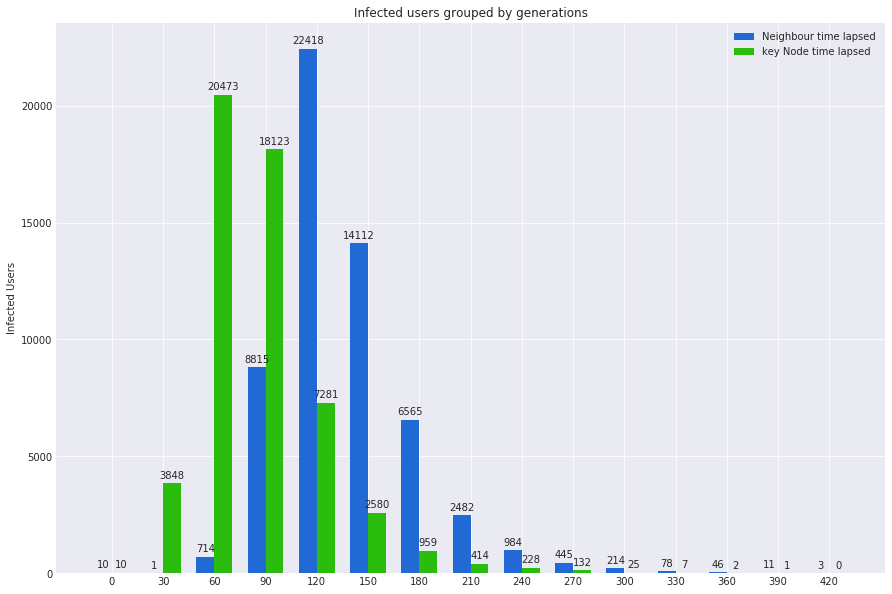

In [356]:
plot_grouped_bar(labels=betweenness_time_lapsed_labels,
                 first_series=neighbour_betweenness_time_lapsed, 
                 second_series=key_node_betweenness_time_lapsed, 
                 first_label="Neighbour time lapsed", 
                 second_label="key Node time lapsed", 
                 title="Infected users grouped by generations",
                 ylabel="Infected Users")

In [68]:
from itertools import accumulate

neighbour_betweenness_time_lapsed_agg = list(accumulate(neighbour_betweenness_time_lapsed))
key_node_betweenness_time_lapsed_agg = list(accumulate(key_node_betweenness_time_lapsed))

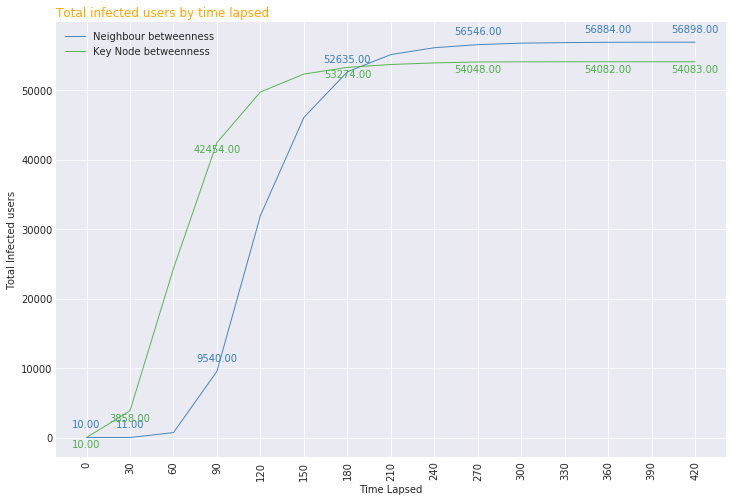

In [69]:
betweenness_df = pd.DataFrame({"x":betweenness_time_lapsed_labels,
                   "Neighbour betweenness":neighbour_betweenness_time_lapsed_agg,
                   "Key Node betweenness": key_node_betweenness_time_lapsed_agg})

plot_grouped_line(df=betweenness_df,
                  title="Total infected users by time lapsed",
                  xlabel="Time Lapsed",
                  ylabel="Total Infected users")


## givenchy cumulative accuracy

In [199]:
gca_6hrs = pd.read_csv(get_output_file_path("givenchy_cumulative_accuracy_6hrs_6hrs_model.csv"))

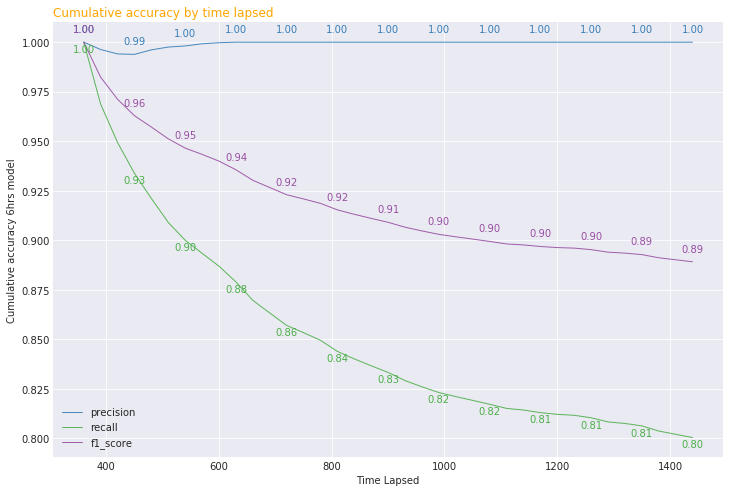

In [200]:
plot_grouped_line(df=gca_6hrs,
                  x_column="hour",
                  title="Cumulative accuracy by time lapsed",
                  xlabel="Time Lapsed",
                  ylabel="Cumulative accuracy 6hrs model")


In [195]:
givenchy_cumulative_accuracy_6hrs = pd.read_csv(get_output_file_path("givenchy_cumulative_accuracy_6hrs_6hrs_model_retrained.csv"))

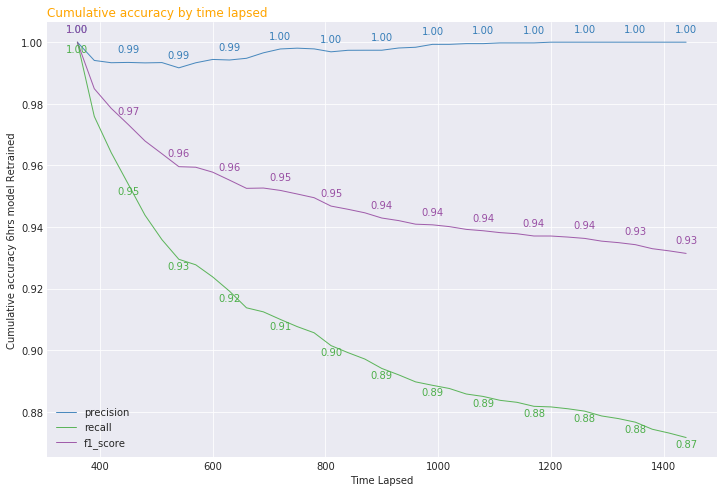

In [201]:
plot_grouped_line(df=gca_retrained_6hrs,
                  x_column="hour",
                  title="Cumulative accuracy by time lapsed",
                  xlabel="Time Lapsed",
                  ylabel="Cumulative accuracy 6hrs model Retrained")


In [94]:
givenchy_cumulative_accuracy_6hrs = pd.read_csv(get_output_file_path("givenchy_cumulative_accuracy_6hrs_6hrs_model_retrained_by_time_lapsed.csv"))


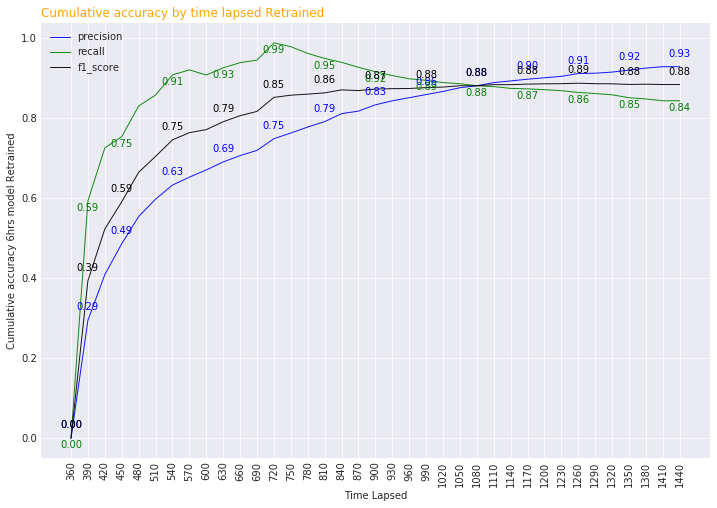

In [121]:
plot_grouped_line(df=givenchy_cumulative_accuracy_6hrs,
                  x_column="hour",
                  title="Cumulative accuracy by time lapsed Retrained",
                  xlabel="Time Lapsed",
                  ylabel="Cumulative accuracy 6hrs model Retrained")


In [126]:
givenchy_cumulative_accuracy_7hrs = pd.read_csv(get_output_file_path("givenchy_cumulative_accuracy_7hrs_7hrs_model_retrained_by_time_lapsed.csv"))


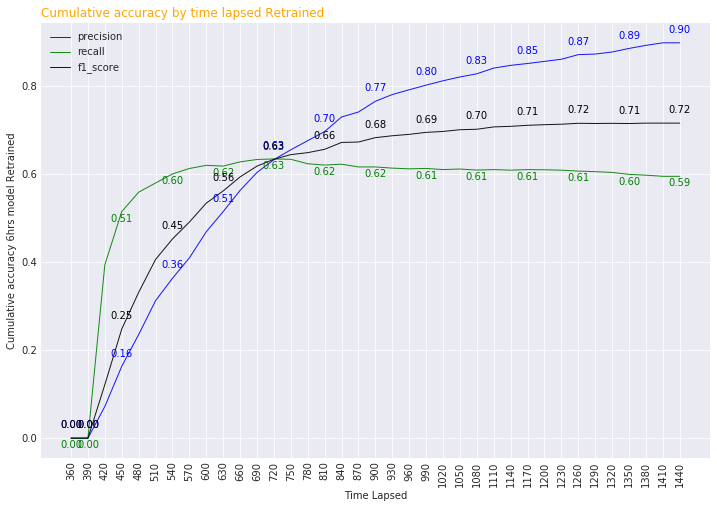

In [127]:
plot_grouped_line(df=givenchy_cumulative_accuracy_7hrs,
                  x_column="hour",
                  title="Cumulative accuracy by time lapsed Retrained",
                  xlabel="Time Lapsed",
                  ylabel="Cumulative accuracy 6hrs model Retrained")


In [128]:
givenchy_cumulative_accuracy_8hrs = pd.read_csv(get_output_file_path("givenchy_cumulative_accuracy_8hrs_8hrs_model_retrained_by_time_lapsed.csv"))

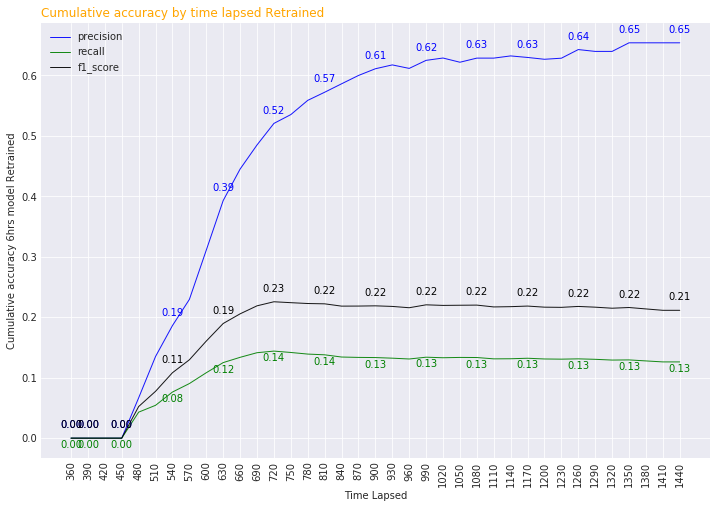

In [129]:
plot_grouped_line(df=givenchy_cumulative_accuracy_8hrs,
                  x_column="hour",
                  title="Cumulative accuracy by time lapsed Retrained",
                  xlabel="Time Lapsed",
                  ylabel="Cumulative accuracy 6hrs model Retrained")

In [93]:
ti_df = pd.read_csv(get_output_file_path("givenchy_total_infection_by_time_lapsed_6hrs_6hrs_model_retrained.csv"))

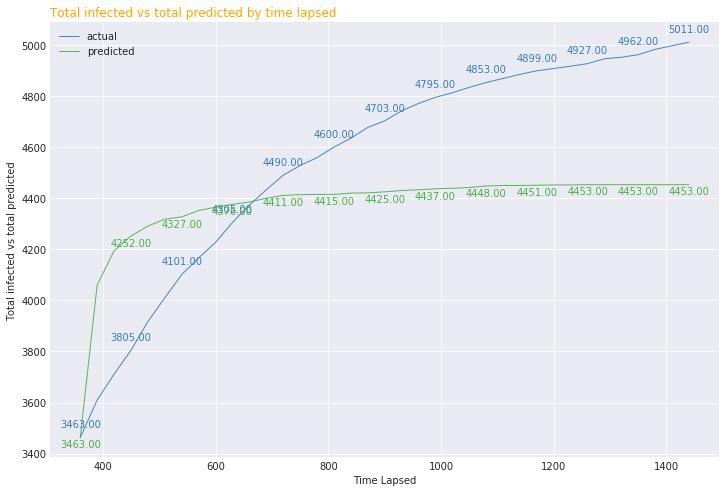

In [210]:
plot_grouped_line(df=ti_df,
                  x_column="hour",
                  title="Total infected vs total predicted by time lapsed",
                  xlabel="Time Lapsed",
                  ylabel="Total infected vs total predicted")


In [226]:
actual_v_predicted_df = pd.read_csv(get_output_file_path("givenchy_cumulative_accuracy_model_retrained.csv"))

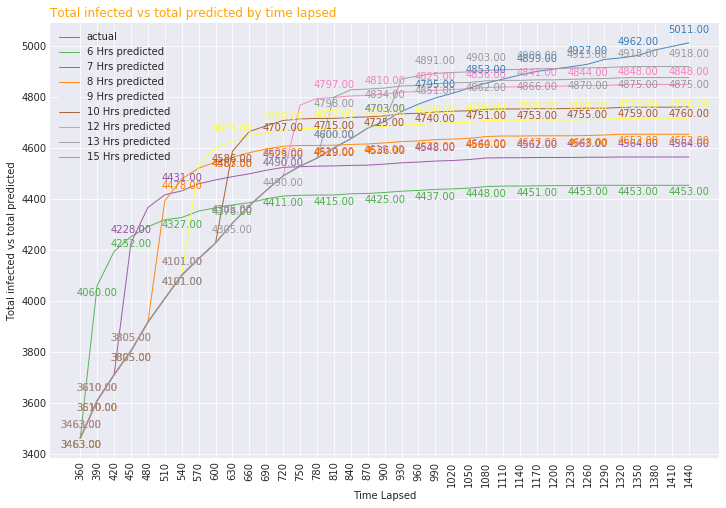

In [227]:
plot_grouped_line(df=actual_v_predicted_df,
                  x_column="hour",
                  title="Total infected vs total predicted by time lapsed",
                  xlabel="Time Lapsed",
                  ylabel="Total infected vs total predicted")


In [506]:
nyc_accuracy_df = pd.read_csv(get_output_file_path("nyc_actual_vs_predicted_accuracy.csv"))

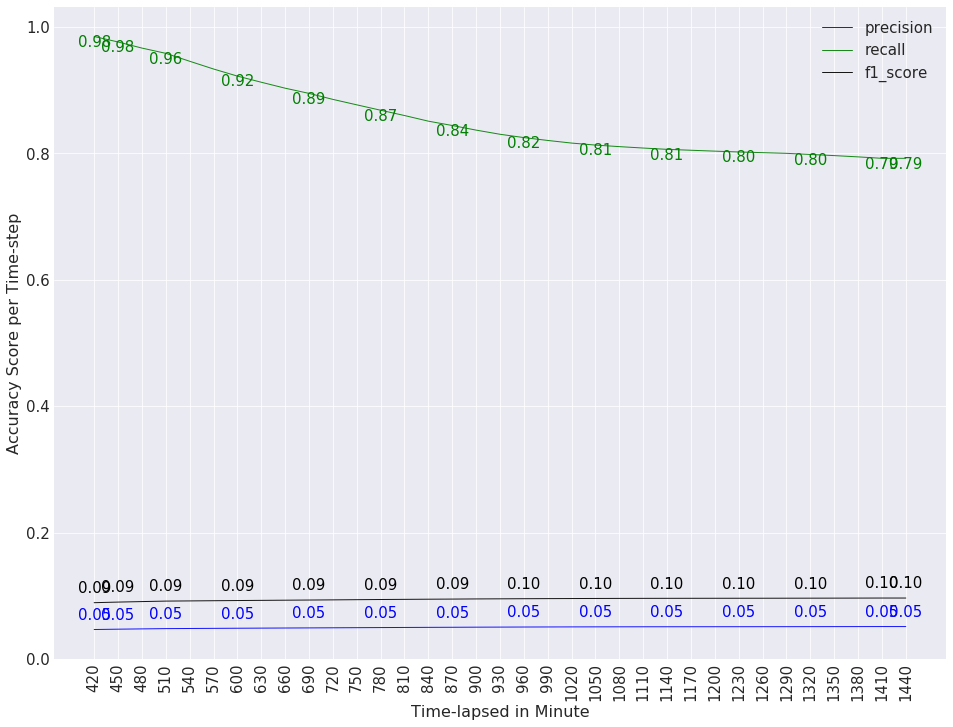

In [543]:
plot_grouped_line(df=nyc_accuracy_df,
                  x_column="hour",
                  title="",
                  xlabel="Time-lapsed in Minute",
                  ylabel="Accuracy Score per Time-step",
                  fig_size=[16,12])


In [517]:
nyc_error_df = pd.read_csv(get_output_file_path("nyc_inaccurate_results.csv"))

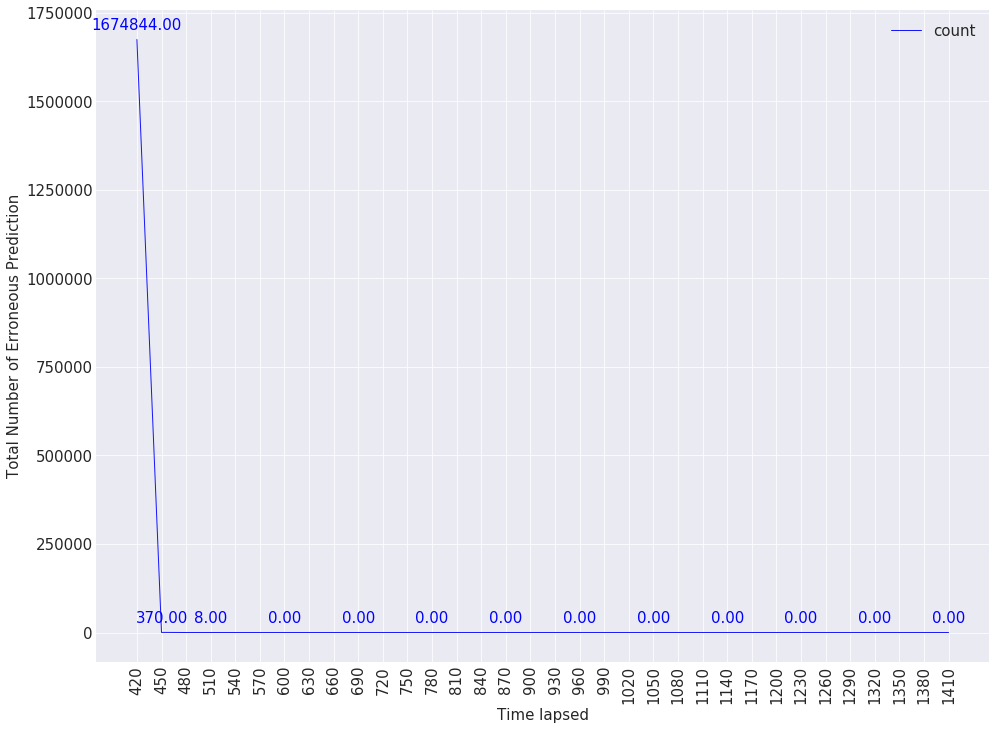

In [538]:
plot_grouped_line(df=nyc_error_df,
                  x_column="hour",
                  title="",
                  xlabel="Time lapsed",
                  ylabel="Total Number of Erroneous Prediction")


In [284]:
givenchy_seed_by_time_df = pd.read_csv(get_output_file_path("givenchy_seed_by_time.csv"))

In [264]:
def plot_bar(x, y, xlabel, ylabel, title):
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x, y, width, color='#7f6d5f')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    autolabel(rects1)

    fig.tight_layout()

    plt.show()


In [286]:
givenchy_seed_by_time_df = givenchy_seed_by_time_df.drop('count', 1)

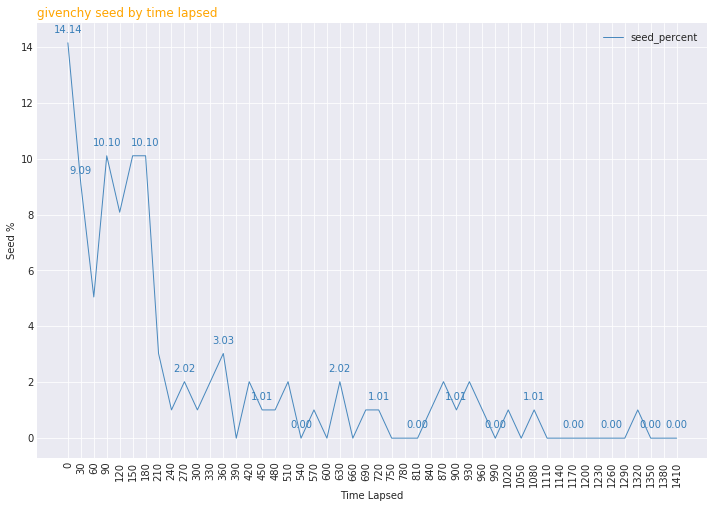

In [287]:
plot_grouped_line(df=givenchy_seed_by_time_df,
                  x_column="hour",
                  title="givenchy seed by time lapsed",
                  xlabel="Time Lapsed",
                  ylabel="Seed %")


## Key node identification

In [475]:
def plot_network_single_seed(graph, title, root_idx):
    plt.axis('off')
    root_node = graph.nodes[root_idx]
    pos = graphviz_layout(graph, prog="circo", args='')
    depth = max(nx.get_node_attributes(graph,'generation').values()) + 1
    colors = get_colors(depth)
    color = [colors[graph.node[n].get("generation", 0)] for n in graph]
    dzcnapy.small_attrs["node_color"] = color
    nx.draw_networkx(graph, pos=pos, with_labels=False, **dzcnapy.small_attrs)
    patchList = []
    for index in range(depth):
        data_key = mpatches.Patch(color=colors[index], label='Generation {}'.format(index))
        patchList.append(data_key)
    plt.legend(handles=patchList)
    dzcnapy.set_extent(pos, plt)
    dzcnapy.plot(title, [24, 16], save=True)
    
def spreading_network_single_seed(users, title, root_idx):
    users = users[users['time_lapsed'].isnull() == False]
    a=[0,1,2]
    unique_users=users[users.generation.isin(a)]
    network_all = build_networkx_graph(unique_users)
    plot_network_single_seed(network_all, title, root_idx)
    

In [226]:
stanford_seed_806 = load_pickle_file(get_output_file_path("simulation_result_key_node_betweenness_stanford_seed_806.dat"))

Loading data file from /Users/syamantak/JayateeB/dissertation/output/simulation_result_key_node_betweenness_stanford_seed_806.dat
Loaded 9765 entries


100%|██████████| 9509/9509 [00:00<00:00, 11672.74it/s]


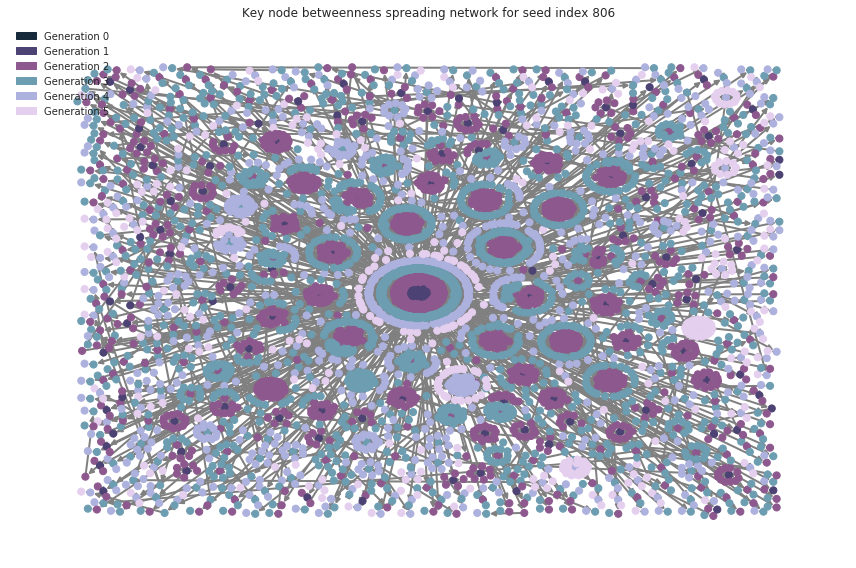

In [229]:
spreading_network(stanford_seed_806, "Key node betweenness spreading network for seed index 806")

100%|██████████| 5004/5004 [00:00<00:00, 10624.23it/s]


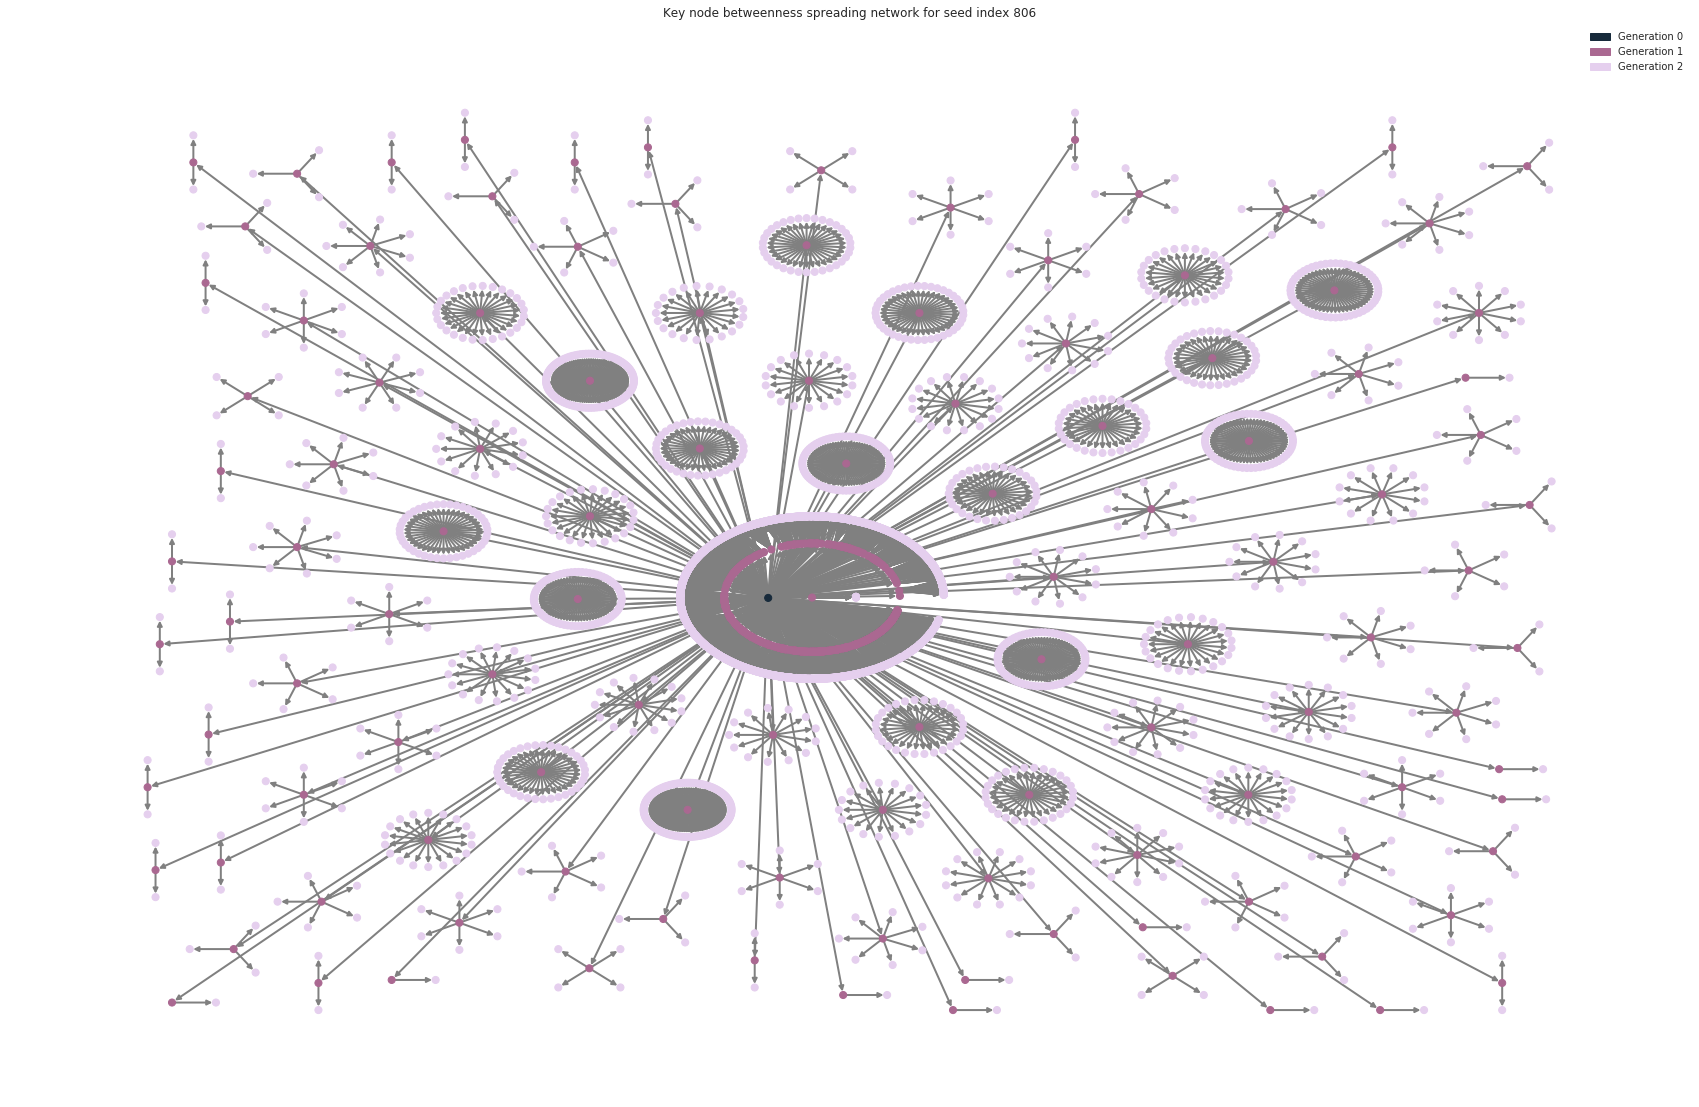

In [255]:
spreading_network_single_seed(stanford_seed_806, "Key node betweenness spreading network for seed index 806", 806)

In [470]:
stanford_seed_1441 = load_pickle_file(get_output_file_path("simulation_result_key_node_betweenness_stanford_seed_1441.dat"))

Loading data file from /Users/syamantak/JayateeB/dissertation/output/simulation_result_key_node_betweenness_stanford_seed_1441.dat
Loaded 9458 entries


100%|██████████| 9170/9170 [00:00<00:00, 10768.13it/s]


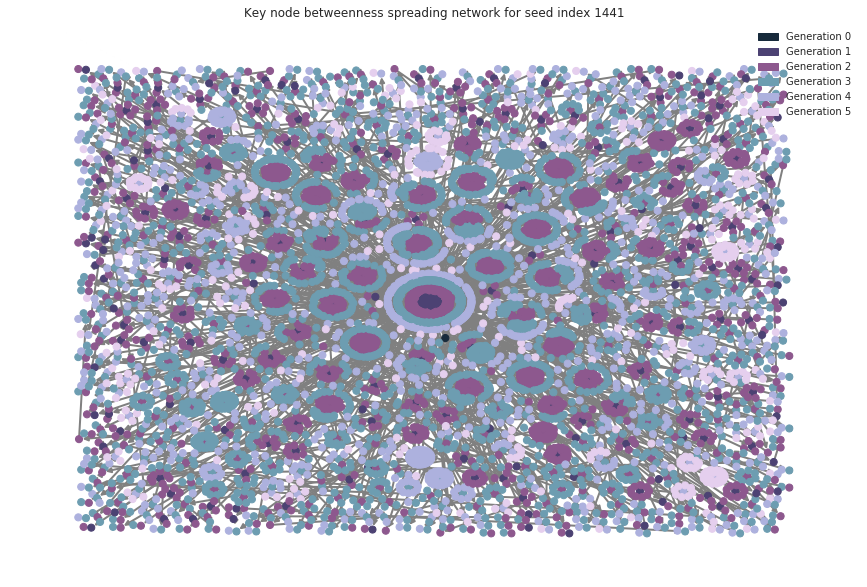

In [473]:
spreading_network(stanford_seed_1441, "Key node betweenness spreading network for seed index 1441")

100%|██████████| 4112/4112 [00:00<00:00, 11186.50it/s]


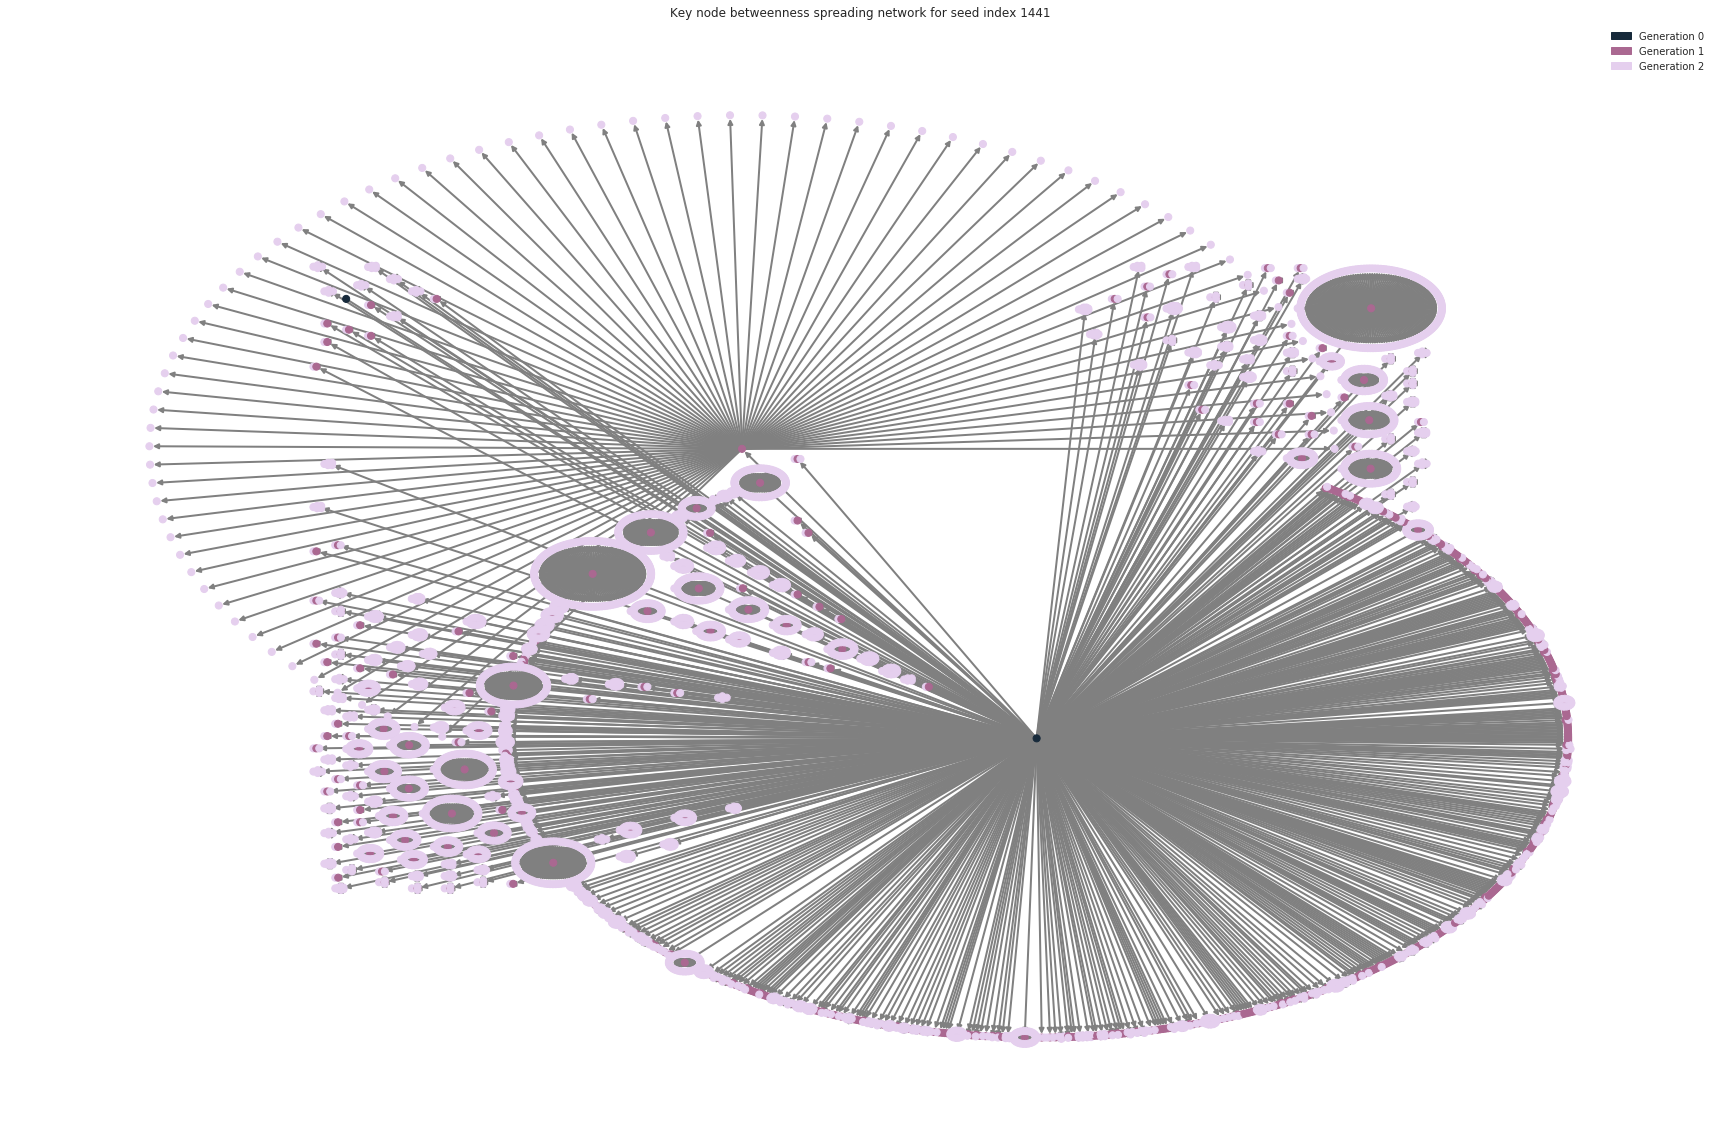

In [476]:
spreading_network_single_seed(stanford_seed_1441, "Key node betweenness spreading network for seed index 1441", 1441)

In [477]:
df = load_pickle_file(get_output_file_path("Stanford_network_simulation_Degree_5.pkl"))

Loading data file from /Users/syamantak/JayateeB/dissertation/output/Stanford_network_simulation_Degree_5.pkl
Loaded 70013 entries


In [479]:
df['source_index'] = None

# d=0
for i in range(len(unique_users)):
    source_id = df.loc[i,'source_id']
    source_index = df[df.user_id.isin([source_id])].index.values
#     print(source_index)
    if len(source_index) != False:
        df.loc[i,'source_index']=int(source_index)
        df.loc[i,'time_since_seed']=df.loc[i,'time_lapsed']-df.loc[int(source_index),'time_lapsed']
        

In [492]:
a=[0,1,2,3,4,5]
unique_users=df[df.generations.isin(a)]
unique_users

t_current    user_id                                  source_candidates  \
3           NaN   28465635  [2, 111, 36, 158, 83, 118, 179, 148, 65, 130, ...   
5           NaN   18996905  [4, 64, 42, 173, 66, 155, 153, 112, 43, 156, 2...   
12          NaN   19705747  [159, 62, 3, 61, 82, 87, 193, 146, 33, 165, 80...   
40          NaN   14925700  [31, 160, 0, 92, 73, 16, 88, 108, 84, 140, 37,...   
50          NaN    6581292  [134, 103, 86, 174, 43, 37, 96, 62, 0, 83, 75,...   
58          NaN   40981798  [57, 90, 50, 8, 108, 133, 148, 11, 110, 171, 1...   
70          NaN  157829215  [16, 33, 0, 54, 156, 146, 25, 62, 123, 36, 2, ...   
75          NaN   19493072  [73, 118, 20, 77, 86, 103, 94, 70, 154, 47, 96...   
129         NaN   18951737  [108, 58, 70, 76, 88, 103, 61, 11, 18, 49, 52,...   
198         NaN     767809                          [197, 209, 224, 211, 240]   
202         NaN   83876527  [201, 222, 225, 254, 240, 216, 204, 207, 209, ...   
212         NaN   16877939  [211, 235, 264, 221, 244, 243, 55014, 41654, 5...   
214         NaN   46073276  [213, 216, 229, 202, 219, 255, 203, 226, 261, ...   
218         NaN    7712232                                   [224, 235, 6539]   
220         NaN   37977732  [218, 244, 259, 256, 262, 243, 205, 211, 260, ...   
222         NaN   44436825  [203, 242, 220, 230, 244, 196, 224, 240, 253, ...   
224         NaN    9973842  [236, 195, 202, 247, 257, 196, 221, 262, 266, ...   
228         NaN   14677919  [227, 222, 207, 209, 243, 213, 200, 211, 199, ...   
230         NaN   10075442                [203, 198, 237, 255, 236, 212, 218]   
233         NaN  111615736  [254, 216, 229, 257, 253, 66175, 6539, 66196, ...   
235         NaN    9503302      [221, 204, 268, 240, 238, 260, 201, 211, 224]   
236         NaN    5533902  [220, 259, 240, 258, 238, 54994, 54996, 55027,...   
237         NaN   14551276  [197, 238, 199, 211, 247, 235, 260, 225, 209, ...   
239         NaN   98976495  [238, 270, 268, 202, 229, 197, 11292, 3151, 15...   
240         NaN   22200888  [238, 230, 237, 244, 195, 211, 205, 197, 255, ...   
244         NaN  163937752  [243, 259, 15084, 15141, 15153, 15164, 6539, 1...   
247         NaN   79797834  [238, 233, 258, 229, 256, 257, 216, 263, 220, ...   
249         NaN  138549366  [224, 196, 255, 231, 203, 222, 229, 195, 214, ...   
253         NaN  117998529                                         [224, 202]   
256         NaN   38718720           [253, 233, 227, 207, 55034, 55026, 6549]   
...         ...        ...                                                ...   
69841       NaN   68147919                   [23135, 1635, 2758, 3439, 69843]   
69842       NaN   16464385  [1345, 53168, 2758, 9689, 14644, 2401, 69826, ...   
69845       NaN   18567611  [1230, 38091, 2758, 69842, 31456, 69826, 50701...   
69846       NaN   18379911                        [3426, 53168, 52375, 69849]   
69848       NaN   23900993                                     [50701, 23135]   
69850       NaN  124451036   [69840, 69832, 69826, 14194, 2422, 23135, 69821]   
69852       NaN   45165047                               [8706, 53168, 23135]   
69857       NaN   14389837  [3426, 1345, 36265, 15199, 2445, 23089, 9099, ...   
69859       NaN   44036670  [2500, 31067, 36265, 69837, 20511, 23135, 2445...   
69860       NaN   18052452           [2422, 23135, 69838, 38091, 1345, 69820]   
69862       NaN   34722951                              [23135, 38091, 53168]   
69864       NaN  211455727                                      [2416, 23135]   
69865       NaN  123018256                               [38091, 1230, 53168]   
69868       NaN  192928463                         [69843, 69867, 1230, 2416]   
69870       NaN   55571656                               [36265, 23135, 2416]   
69875       NaN   43347885  [31067, 23135, 2539, 1345, 30559, 69859, 53168...   
69876       NaN   69463057                                      [2416, 23135]   
69879       NaN   28860222           

In [494]:
network_all = nx.DiGraph()
for i in tqdm(range(len(unique_users))):
    index = unique_users.index[i]
    network_all.add_node(index,
                         user_id = unique_users.loc[index, 'user_id'],
                         time_lapsed = unique_users.loc[index, 'time_lapsed'],
                         followers_count = unique_users.loc[index, 'followers_count'],
                         friends_count = unique_users.loc[index, 'friends_count'],
                         generation = unique_users.loc[index, 'generations'],
                         time_since_seed = unique_users.loc[index, 'time_since_seed'],
                        )
    source_index = unique_users.loc[index, 'source_index']
#     print(source_index)
    network_all.add_edge(source_index, index)
len(network_all)

100%|██████████| 20167/20167 [00:01<00:00, 12194.90it/s]


20168

In [497]:
def get_colors_1(depth):
    return sns.cubehelix_palette(depth, start=3, rot=1, reverse=True)
    sns.palplot(colors)
    
def plot_network_1(graph, title):
    plt.axis('off')
    pos = graphviz_layout(graph)
    depth = max(nx.get_node_attributes(graph,'generation').values()) + 1
    colors = get_colors_1(depth)
    color = [colors[graph.node[n]["generation"]] for n in graph]
    dzcnapy.small_attrs["node_color"] = color
    nx.draw_networkx(graph, pos=pos, with_labels=False, **dzcnapy.small_attrs)
    patchList = []
    for index in range(depth):
        data_key = mpatches.Patch(color=colors[index], label='Generation {}'.format(index))
        patchList.append(data_key)
    plt.legend(handles=patchList)
    dzcnapy.set_extent(pos, plt)
    dzcnapy.plot(title, [15, 15], save=True)

KeyError: 'generation'

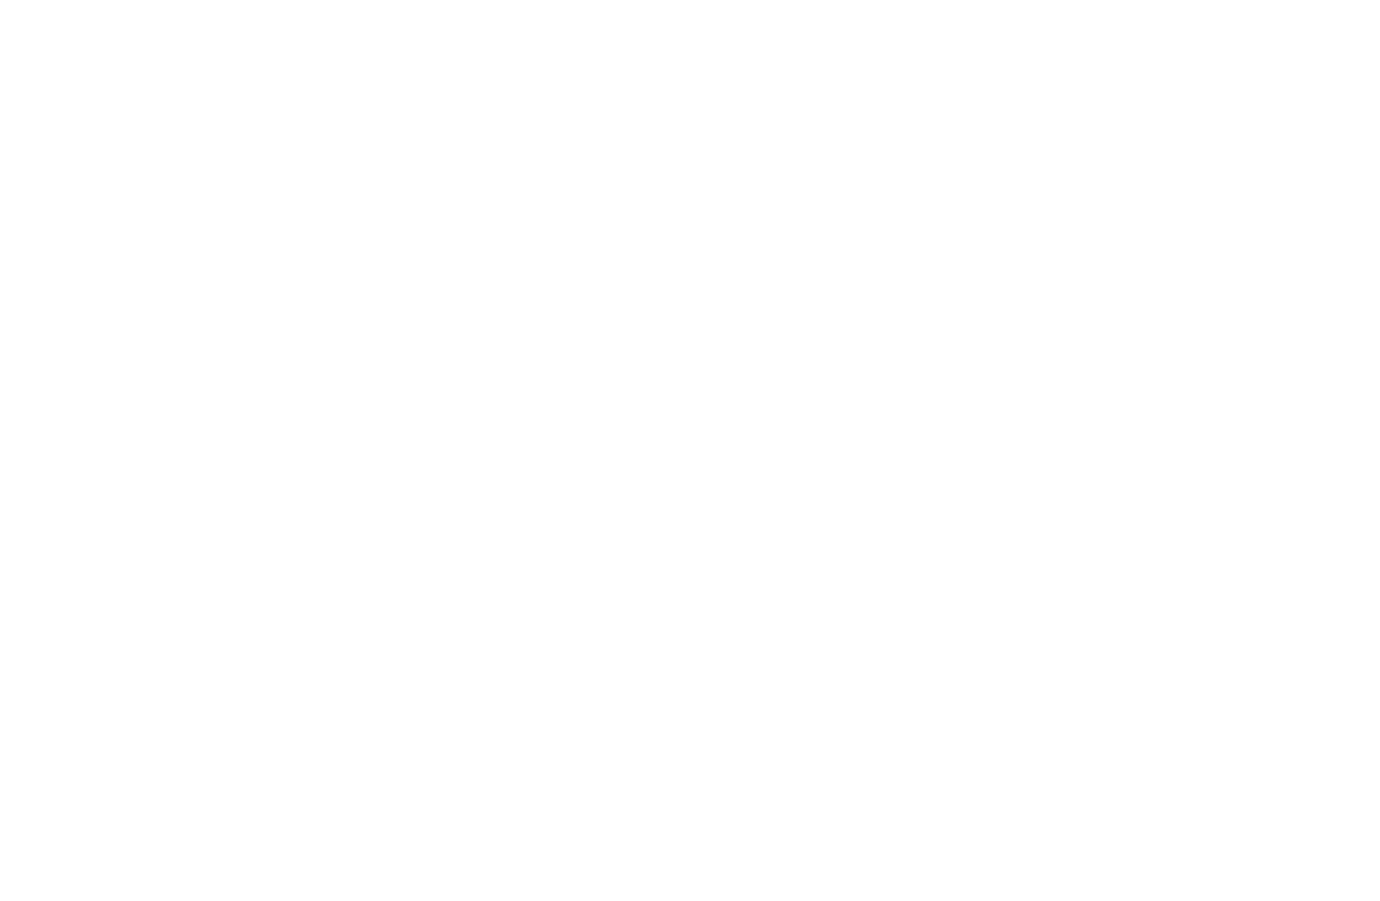

In [498]:
plot_network_1(network_all, "Single-seeding Strategy (Degree)")

In [500]:
stanford_df = pd.read_csv(get_output_file_path("simulation_result_key_node_betweenness_0_10_10_0point75_correct.csv"))

In [503]:
a=[0,1,2,3,4,5]
stanford_df=stanford_df[stanford_df.generation.isin(a)]
stanford_df=stanford_df[stanford_df.time_lapsed.isnull() == False]

100%|██████████| 52315/52315 [00:04<00:00, 11531.04it/s]


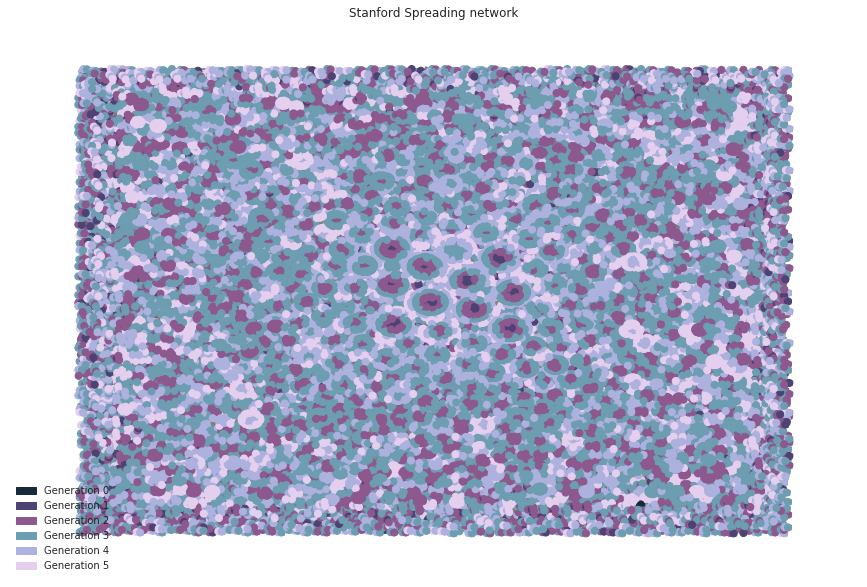

In [504]:
spreading_network(stanford_df, "Stanford Spreading network")

In [415]:
niu_24_df = pd.read_csv(get_output_file_path("user_infection_over_24_hours.csv"))

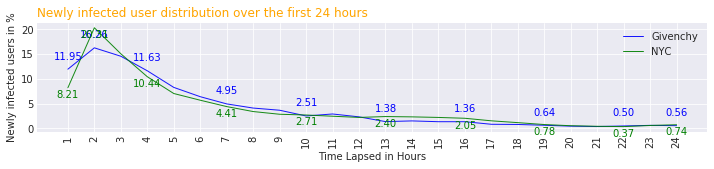

In [416]:
plot_grouped_line(df=niu_24_df,
                  x_column="hour",
                  title="Newly infected user distribution over the first 24 hours",
                  xlabel="Time Lapsed in Hours",
                  ylabel="Newly infected users in %",
                  fig_size=[12,20])


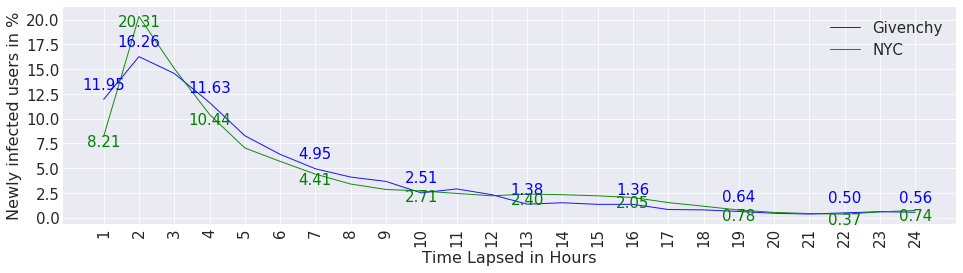

In [553]:
plot_grouped_line(df=niu_24_df,
                  x_column="hour",
                  title="",
                  xlabel="Time Lapsed in Hours",
                  ylabel="Newly infected users in %",
                  fig_size=[16,4])

In [528]:
hour_dict = {"hour":[420, 450, 480], "precision":[0.202838, 0.231838, 0.247838], "recall": [0.113234, 0.123534, 0.130734], "f1_score": [0.145335, 0.157365, 0.171265]}

In [554]:
hour_dict = {"hour":[420, 450, 480], "precision":[0.6612, 0.74113, 0.8121], "recall": [0.423234, 0.443534, 0.45304], "f1_score": [0.5235, 0.537365, 0.551265]}


In [555]:
hour_dict_df = pd.DataFrame.from_dict(hour_dict)

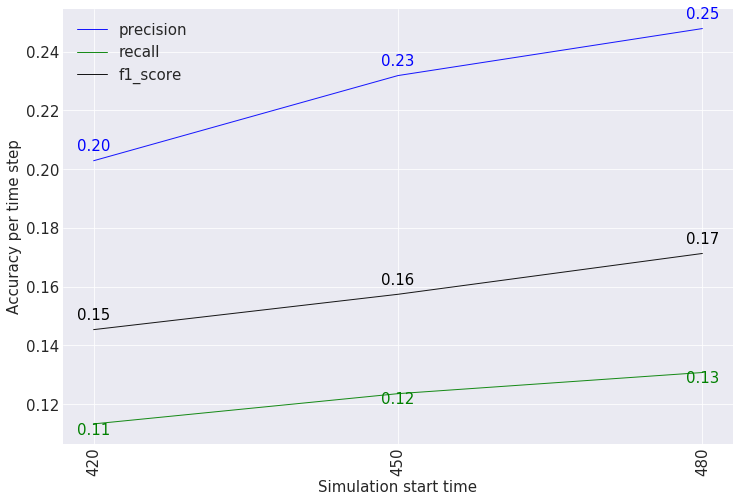

In [535]:
plot_grouped_line(df=hour_dict_df,
                  x_column="hour",
                  title="",
                  xlabel="Simulation start time",
                  ylabel="Accuracy per time step",
                  fig_size=[12,8])

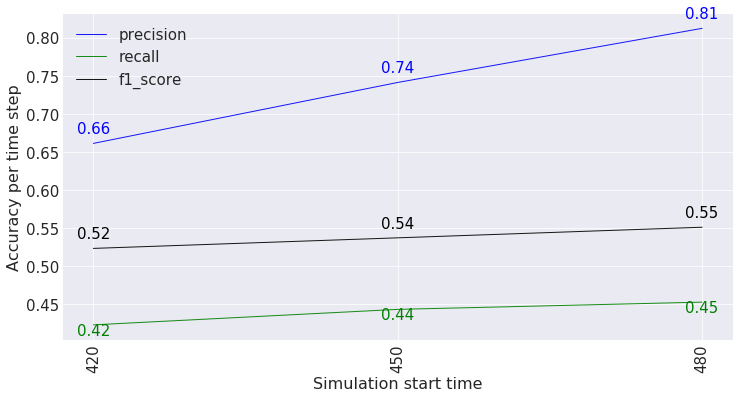

In [577]:
plot_grouped_line(df=hour_dict_df,
                  x_column="hour",
                  title="",
                  xlabel="Simulation start time",
                  ylabel="Accuracy per time step",
                  fig_size=[12,6])